# KS Test in R

## Loading Data

In [1]:
grn <- read.csv('grn.csv')

In [2]:
grn <- grn[c('name', 'randType', 'sensitivity')]

In [3]:
grn$randType <- as.character(grn$randType)

In [4]:
grn$is.bio <- grn$randType == ''

## Plotting Data

In [5]:
library(ggplot2)

Warning message:
“Removed 8500 rows containing non-finite values (stat_density).”

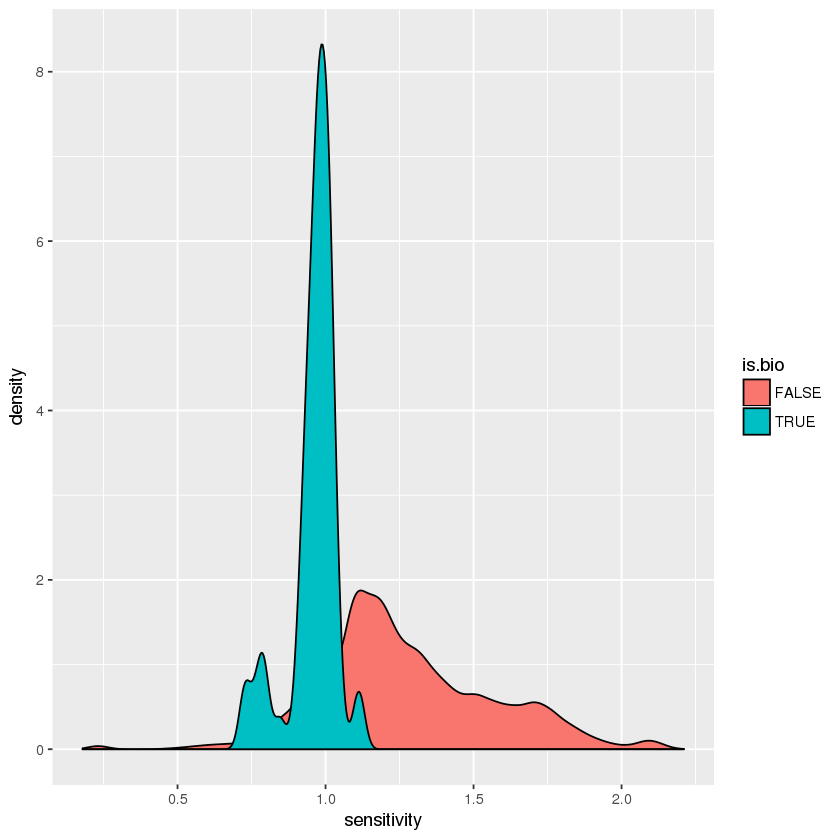

In [6]:
sens.plot <- ggplot(grn)
sens.plot + geom_density(aes(sensitivity, fill=is.bio))

## Analyzing Data

In [7]:
bio.s <- grn[grn$is.bio, 'sensitivity']

In [8]:
rand.s <- grn[grn$randType == 'fixed-structure-node-bias irreducible', 'sensitivity']

In [9]:
ks.test(rand.s, bio.s)

Warning message in ks.test(rand.s, bio.s):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  rand.s and bio.s
D = 0.55669, p-value = 4.441e-16
alternative hypothesis: two-sided


In [10]:
nets = unique(grn$name)
for (net in nets) {
    net.df <- grn[grn$name == net, ]
    bio.value <- net.df[net.df$is.bio, 'sensitivity']
    net.cdf <- ecdf(net.df$sensitivity)
    p.value <- net.cdf(bio.value)
    cat(net, '=> p =', p.value, '\n')
}

Apoptosis Network => p = 0.01665279 
B Bronchiseptica And T Retortaeformis Coinfection => p = 0.0008326395 
B Cell Differentiation => p = 0.0008326395 
BT474 Breast Cell Line Long-term ErbB Network => p = 0.0008326395 
BT474 Breast Cell Line Short-term ErbB Network => p = 0.002497918 
Body Segmentation In Drosophila 2013 => p = 0.03913405 
Bordetella Bronchiseptica => p = 0.0008326395 
Budding Yeast Cell Cycle => p = 0.0008326395 
Budding Yeast Cell Cycle 2009 => p = 0.0008326395 
CD4 T Cell Signaling => p = 1 
CD4+ T Cell Differentiation And Plasticity => p = 0.000999001 
Cardiac Development => p = 0.0008326395 
Cell Cycle Transcription By Coupled CDK And Network Oscillators => p = 0.09408826 
Cholesterol Regulatory Pathway => p = 0.44796 
Colitis-associated Colon Cancer => p = 0.06661116 
Cortical Area Development => p = 0.6104869 
Death Receptor Signaling => p = 0.05162365 
Differentiation Of T Lymphocytes => p = 0.0008326395 
Egfr & Erbb Signaling => p = 0.9900498 
FA BRCA Pathway 